In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import yfinance as yfin

import requests
import xlsxwriter
from datetime import date
import datetime

In [2]:
### This function returns the data for a certain duration of time @@@@@@@@@@@@@
#################@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
def company(name,duration,start,end):
    yfin
    # name = 'HDFCLIFE.NS'
    ticker = yfin.Ticker(name)
    if (len(start)!= 0 and len(end)!=0):
        print(ticker)
        data=ticker.history(start=start,end=end)
#         data=ticker.history(start='2020-11-15',end='2020-12-31')
    else:
        data=ticker.history(period=duration)
    #     data_2y=ticker.history(period='2y')
    # return data
        # ticker.info
        # ticker.financials
    month=data.index.month
    month=month.value_counts().index
    month=month.sort_values(ascending=True)
    year=data.index.year
    year= year.value_counts().index
    year=year.sort_values(ascending=True)
    return (data,ticker,year,month)

In [3]:
yfin
name = 'HDFCBANK.NS'
ticker = yfin.Ticker(name)
data=ticker.history(start='2010-01-01',end='2021-12-31')
month=data.index.month
month=month.value_counts().index
month=month.sort_values(ascending=True)
year=data.index.year
year= year.value_counts().index
year=year.sort_values(ascending=True)
ticker.info

{'regularMarketPrice': None, 'logo_url': ''}

In [4]:
def percDiff(a,b):
    perc= ((b-a)*100)/a
    return perc

In [5]:
# def oneDayRet():
    

In [6]:
def monthlyAnalysis(data):
    data.dropna()
    mn=[] #month min val
    mx=[] #month max val
    minMaxRet=[]
    mx_dt=[]
    mn_dt=[]
    mnth_close=[] #month close val
    mnth_open=[] #month open val
    OpMaxRet=[]
    OpMinRet=[]
    OpCloseRet=[]
    data_monthly=[]
    up_days=[]
    down_days=[]
    yr=data.index.year
    yr=yr.value_counts().index
    yr=yr.sort_values(ascending=True)
    
    month_data=data.index.month
    month_data=month_data.value_counts().index
    month_data=month_data.sort_values(ascending=True)
    
    #mnth=[1,2,3,4,5,6,7,8,9,10,11,12]
    #mnth=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
   
    for i in range(0,len(yr)):
        for j in range(0,len(month_data)):
            x_open=[]
            x_close=[]
            up=[]
            down=[]
            iCnt=0
            iCnt_up=0
            for k in range(0,len(data)):
                if (data.index.year[k]==yr[i]):
                    if (data.index.month[k]==month_data[j]):
                        iCnt+=1
#                         if i==0:
#                             x_open.append(data['Open'][k])
#                         else:
#                             x_open.append(data['Close'][k-1])
                        x_open.append(data['Open'][k])
                        x_close.append(data['Close'][k])
                        #x_close.append({'close':data['Close'][k],'date':data.index.date[k]})
                        if (k+1<len(data) and (int(data['Close'][k+1])>int(data['Close'][k]))):
                            iCnt_up+=1
            if (len(x_open)>0 and len(x_close)>0):
                up=iCnt_up
                down=iCnt-iCnt_up
                mnth_open=x_open[0]
                mnth_close=x_close[len(x_close)-1]
                mn=min(x_close)
                #print(x_close[x_close['close']==min(x_close['close'])])
                #mn=x_close[x_close['close']==max(x_close['close'])]
                mx=max(x_close)
                minMaxRet=percDiff(min(x_close),max(x_close))
                OpMaxRet=percDiff(x_open[0],max(x_close))
                OpMinRet=percDiff(x_open[0],min(x_close))
                OpCloseRet=percDiff(x_open[0],x_close[len(x_close)-1])
                data_monthly.append({'Year':yr[i],'Month':month_data[j],'Open':mnth_open,'Close':mnth_close,'Min':mn,'Max':mx,
                                      'Min-Max(%)':minMaxRet,'Open-Max(%)':OpMaxRet,'Open-Min(%)':OpMinRet,'Open-Close(%)':OpCloseRet,
                                        'No.ofDaysUp':up,'No.ofDaysDown':down})   
    
    return data_monthly

In [7]:
data_nse,ticker_nse,year_nse,month_nse=company('^NSEI','','2015-06-01','2024-12-31')
data_monthly_nse=monthlyAnalysis(data_nse)
df_monthly_nse=pd.DataFrame(data_monthly_nse)
x=df_monthly_nse[df_monthly_nse['Month']==9]
print('Avg no.of Days up:',sum(x['No.ofDaysUp'][:])/len(x))
print('Avg no.of Days down:',sum(x['No.ofDaysDown'][:])/len(x))
print('Avg Open-Close %incr',sum(x['Open-Close(%)'][:])/len(x))
print(len(x))
x
# df_monthly_nse

yfinance.Ticker object <^NSEI>
Avg no.of Days up: 10.2
Avg no.of Days down: 10.2
Avg Open-Close %incr -0.31151451555885556
10


,Year,Month,Open,Close,Min,Max,Min-Max(%),Open-Max(%),Open-Min(%),Open-Close(%),No.ofDaysUp,No.ofDaysDown
3,2015,9,7907.950195,7948.899902,7558.799805,7981.899902,5.597451,0.935131,-4.415182,0.517830,12,8
15,2016,9,8793.599609,8611.150391,8591.250000,8952.500000,4.204860,1.807001,-2.301101,-2.074796,12,8
27,2017,9,9937.650391,9788.599609,9735.750000,10153.099609,4.286774,2.168010,-2.031671,-1.499859,10,11
39,2018,9,11751.799805,10930.450195,10930.450195,11589.099609,6.025821,-1.384470,-6.989139,-6.989139,6,12
51,2019,9,10960.950195,11474.450195,10704.799805,11600.200195,8.364476,5.832067,-2.336936,4.684813,10,9
63,2020,9,11464.299805,11247.549805,10805.549805,11604.549805,7.394348,1.223363,-5.746099,-1.890652,10,12
75,2021,9,17185.599609,17618.150391,17076.250000,17855.099609,4.561011,3.895703,-0.636286,2.516937,11,10
87,2022,9,17485.699219,17094.349609,16818.099609,18070.050781,7.444070,3.341883,-3.817975,-2.238112,8,14
99,2023,9,19258.150391,19638.300781,19435.300781,20192.349609,3.895226,4.850929,0.919872,1.973971,11,9
111,2024,9,25333.599609,25810.849609,24852.150391,26216.050781,5.488058,3.483323,-1.900437,1.883862,12,9


In [15]:
# df_monthly_nse[df_monthly_nse['Month']==1]
dfx=pd.DataFrame(df_monthly_nse)
dfx[['Year','Open-Close']]


,Year,Open-Close
0,2010,6.351811
1,2010,0.548651
2,2010,-3.639362
3,2010,4.448267
4,2010,1.045741
...,...,...
148,2022,9.262465
149,2022,2.993073
150,2022,-2.238112
151,2022,5.321567


In [14]:
data1,ticker,year,month=company('PIDILITIND.NS','','2010-01-01','2021-12-31')
data_monthly=monthlyAnalysis(data1)
df_monthly=pd.DataFrame(data_monthly)
df_monthly["NIFTY Ret"]=((data_nse['Close']-data_nse['Open'])/data_nse['Open'])*100

x=df_monthly[df_monthly['Month']==12]

print("Avg Min-Max %age", sum(x['Min-Max'])/len(year))
print("Avg Open-Max %age", sum(x['Open-Max'])/len(year))
print("Avg Open-Close %age", sum(x['Open-Close'])/len(year))

x

yfinance.Ticker object <PIDILITIND.NS>
Avg Min-Max %age 9.75313064010655
Avg Open-Max %age 4.9475545317527425
Avg Open-Close %age 1.49335285095281


,Year,Month,Open,Close,Min,Max,Min-Max,Open-Max,Open-Min,Open-Close,No.ofDaysUp,No.ofDaysDown,NIFTY Ret
11,2010,12,138.511886,140.497238,131.540131,143.452148,9.055805,3.566670,-5.033327,1.433344,9,13,NaN
23,2011,12,144.791546,134.575897,127.159050,146.330887,15.077053,1.063143,-12.177849,-7.055418,7,14,NaN
35,2012,12,203.824029,205.758026,196.040894,205.758026,4.956687,0.948856,-3.818556,0.948856,9,11,NaN
47,2013,12,287.452734,272.210846,271.401093,293.597137,8.178318,2.137535,-5.584098,-5.302398,4,17,NaN
59,2014,12,445.862380,520.924133,438.572021,520.924133,18.777329,16.835184,-1.635114,16.835184,12,10,NaN
71,2015,12,543.783711,532.647705,508.495605,536.311401,5.470214,-1.374133,-6.489364,-2.047874,12,10,NaN
83,2016,12,624.217794,572.571777,558.349731,625.576904,12.040334,0.217730,-10.552096,-8.273718,11,11,NaN
95,2017,12,822.365936,880.952942,813.626709,922.305603,13.357341,12.152700,-1.062693,7.124201,9,11,NaN
107,2018,12,1140.809707,1093.197998,1087.375854,1185.116089,8.988634,3.883766,-4.683853,-4.173501,9,11,NaN
119,2019,12,1299.464635,1375.746216,1300.406982,1395.337524,7.300064,7.377876,0.072518,5.870231,13,8,NaN


In [7]:
ticker.option_chain

<bound method Ticker.option_chain of yfinance.Ticker object <HDFC.NS>>

In [10]:
def maxRet_year(data):
    data.dropna()
    x=[]
    ##@@@@ getting the max-min data for each year @@@@##############
    yr=data.index.year
    yr= yr.value_counts().index
    yr=yr.sort_values(ascending=True)
    # print(data.index.year.value_counts())
    closeVal=[]
    mx=[]
    mn=[]
    mx_dt=[] ##for storing dates when max occurs
    mn_dt=[] ##for storing dates when min occurs
    yr_end_ret=[]
    yr_open=[]
    yr_end=[]
    fy_ret=[]
    q1_ret=[] #to calculate 1st qtr return
    q2_ret=[] #to calculate 2nd qtr return
    q3_ret=[] #to calculate 3rd qtr return
    q4_ret=[] #to calculate 4th qtr return
    dt=[]
    open_max=[]
    cls_dict=[] ##used for storing the date at which max,min happens
    print(yr)
    for i in range(0,len(yr)):
        dt_FY_mar=[]  ##to get the last trading session date in march
        dt_FY_apr=[]  ## to get the first trading session date in april ##not hard coded as date need not be 01 due to sat/sun/holidays etc..
        for j in range(0,len(data)):
            if data.index.year[j] == yr[i]:
                dt.append(data.index.date[j])
                cls_dict.append({'dt':data.index.date[j],'close':data['Close'][j],'open':data['Open'][j]}) ##dictionary for storing dates of min/max
                closeVal.append(data['Close'][j])
                
                if(data.index.month[j]==4):  ######this line is added to calculate the FY beginning i.e first trading session of April
                    dt_FY_apr.append(data.index.date[j])
            elif (i<len(yr)-1):
                if(data.index.year[j]== yr[i+1] and data.index.month[j]==3): ######this line is added to calculate the FY end i.e last trading session of march of succeding yr
                    dt_FY_mar.append(data.index.date[j])
                    #print(max(dt_FY_mar),yr[i])
        
        
        mx.append(max(closeVal))
        mn.append(min(closeVal))
        
        #######Start:calculating FY return calculations: April-Mar######################
        if i<len(yr)-1 :
            fy_x=data[(data.index==str(min(dt_FY_apr)))]['Open'][0]
            #print(max(dt_FY_mar),yr[i])
            fy_y=data[(data.index==str(max(dt_FY_mar)))]['Close'][0]
            fy_ret.append(percDiff(fy_x,fy_y))
        ##################################END#############################################
        
        ###running the loop to get the dates of min@max value in the year
        unique_Mxcnt=0 ### to avoid counting mx/min multiple times. There are data which has more than 1 time same min/max values
        unique_Mncnt=0
        x=0
        y=0
        dt_mx=''
        dt_mn=''
        for n in range(0,len(closeVal)):
            if cls_dict[n]['close']==max(closeVal) and unique_Mxcnt==0:
                mx_dt.append(cls_dict[n]['dt'])
                dt_mx=cls_dict[n]['dt']
                unique_Mxcnt=1
                #print(cls_dict[n]['dt'],'max')
            elif cls_dict[n]['close']==min(closeVal) and unique_Mncnt==0:
                mn_dt.append(cls_dict[n]['dt'])
                dt_mn=cls_dict[n]['dt']
                unique_Mncnt=1
            
            
            if cls_dict[n]['dt']==min(dt):
                yr_open.append(cls_dict[n]['open'])
                x=cls_dict[n]['open']
                #print(cls_dict[n])
            if cls_dict[n]['dt']==max(dt):
                yr_end.append(cls_dict[n]['close'])
                y=cls_dict[n]['close']
                #print(cls_dict[n])
                #print(cls_dict[n]['dt'],'min')
        yr_end_ret.append(percDiff(x,y))
        open_max.append(percDiff(x,max(closeVal)))
        #print(yr_end_ret)
        ###################################################
        closeVal=[]
        cls_dict=[]
        dt=[]
    
    fy_ret.append(0) ### appending 0 as the latest fiscal return will not be available
    
    max_percRet=[]
    for k in range(0,len(yr)):
        if mx_dt[k]>mn_dt[k]: ###to check if max happens after price hits min.If yes then itis +ve volatility
            max_percRet.append((mx[k]-mn[k])*100/mn[k])
        else:
            max_percRet.append((mn[k]-mx[k])*100/mn[k]) ##In this case -ve volatility

    dict1={'Year':yr,'Max':mx,'Min':mn,'Min-Max Return':max_percRet,'Open-Max Ret':open_max,'Max_Date':mx_dt,'Min_Date':mn_dt,'Yr Open':yr_open,'Yr Close':yr_end,'Jan-Dec Ret':yr_end_ret,'Apr-Mar(FY)':fy_ret}
    df=pd.DataFrame(dict1).sort_values(by=['Year'])
    df.reset_index(drop=True,inplace=True)
    #print(mx_dt,'\n',mn_dt)
    #plt.subplot(2, 2, 1)
    plt.scatter(yr,mx,label='Max')
    plt.scatter(yr,mn,label='MIN')
    plt.scatter(yr,yr_open,label='Open Price')
    #plt.subplot(2, 2, 2)
    
    return df


##@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@##########################

In [11]:
def pksAndValley(data1,df1):    
    from datetime import datetime
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import find_peaks

    ##@@@@@@@@@@@to store dynamically the peak values for all the years@@@@@@@@@@@@@@@@@

    yr=data1.index.year
    yr=yr.value_counts().index.sort_values(ascending=True)
    pks=[]
    for i in range(0,len(yr)):
    #     print(data1[(data1.index.year>'2020')])
        if(i<len(yr)-1):
            x = data1[(data1.index> datetime.strptime(str(yr[i])+'-01-01','%Y-%m-%d')) & 
                  (data1.index<datetime.strptime(str(yr[i+1])+'-01-01','%Y-%m-%d'))]['Close']
        else:
            x = data1[(data1.index> datetime.strptime(str(yr[i])+'-01-01','%Y-%m-%d')) & 
                  (data1.index<datetime.strptime(str(yr[i]+1)+'-01-01','%Y-%m-%d'))]['Close']
        x.reset_index(inplace=True,drop=True)
        peaks, _=find_peaks(x,prominence=20)

        plt.figure(figsize=(20,10))
        plt.legend([yr[i]])
        plt.subplot(3, 1, 1)
        plt.plot(peaks, x[peaks], "ob"); plt.plot(x); plt.legend(['prominence',yr[i]])
    #     print(peaks, yr[i])
        pks.append(peaks)
    pks
    # print(pks[0],"--pks1")

    # plt.figure(figsize=(20,10))
    # plt.subplot(3, 3, 1)
    # plt.plot(pks[0], x[pks[0]], "ob"); plt.plot(x); plt.legend(['prominence'])
    # plt.plot(pks[1], x[pks[1]], "ob"); plt.plot(x); plt.legend(['prominence'])

    plt.show()


In [12]:
data2,ticker2,year2,month2=company('^NSEI','','2008-01-01','2022-12-31')
df2=maxRet_year(data2)
df2

yfinance.Ticker object <^NSEI>
Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021, 2022],
           dtype='int64')


ValueError: max() arg is an empty sequence

yfinance.Ticker object <ASIANPAINT.NS>
Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
            2021],
           dtype='int64')


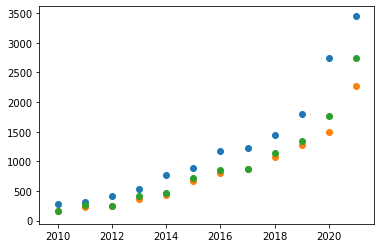

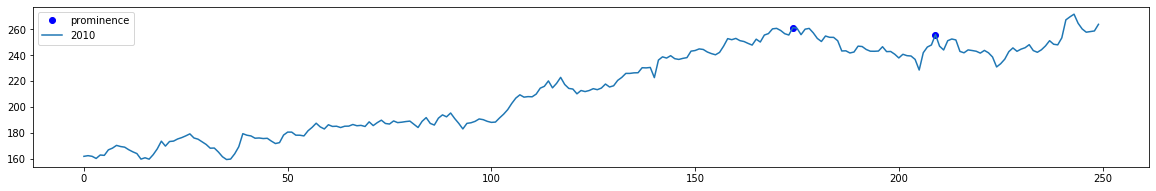

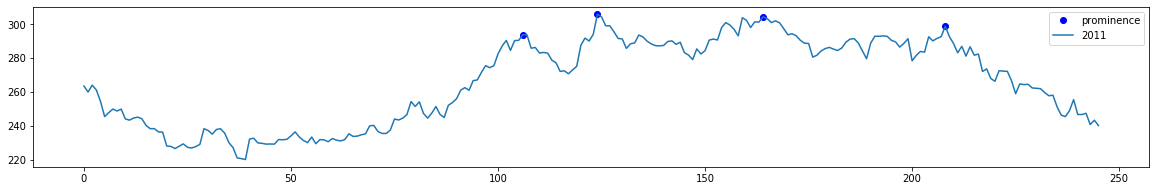

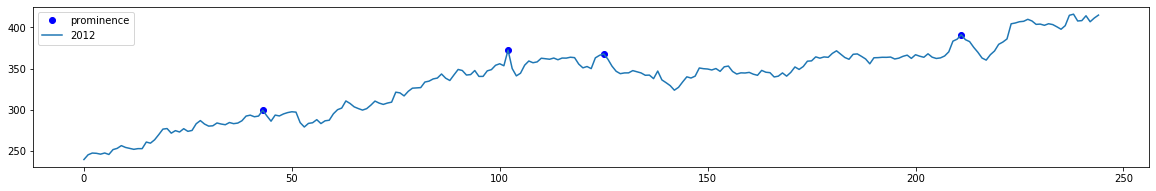

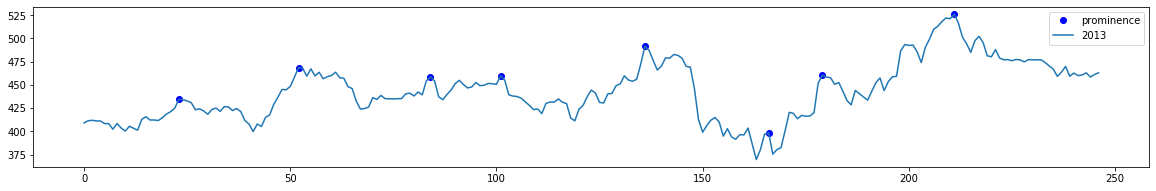

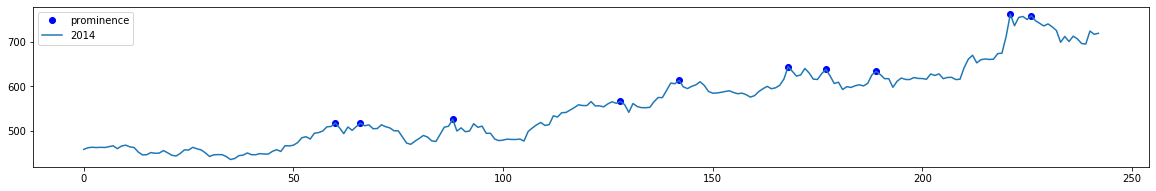

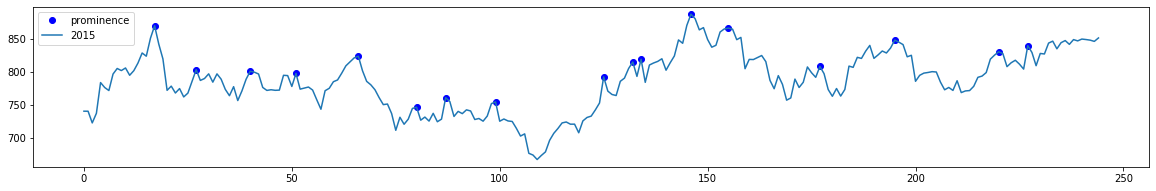

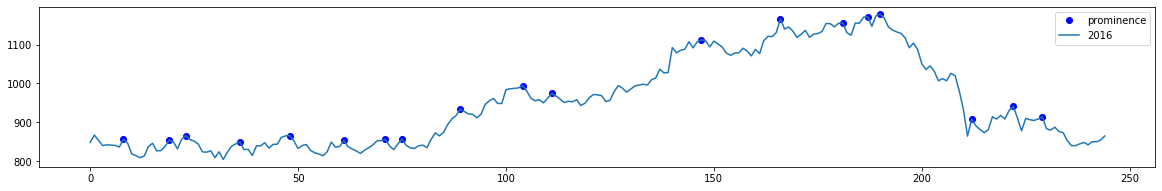

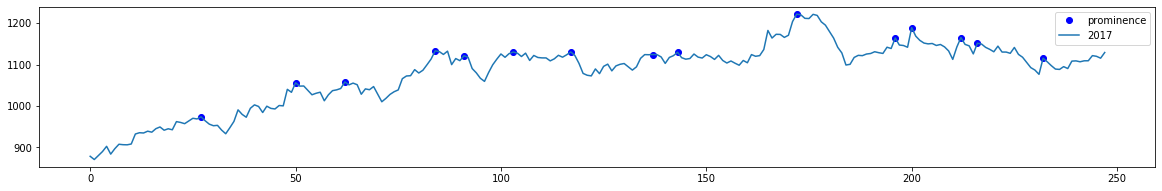

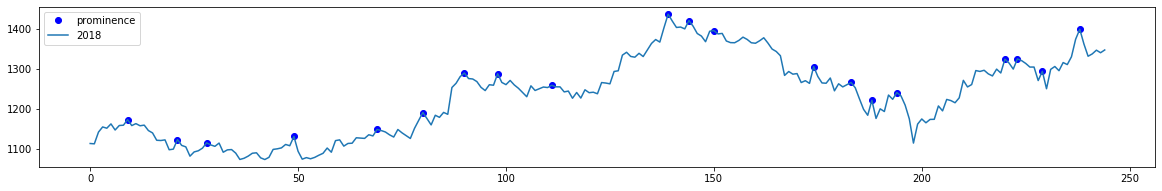

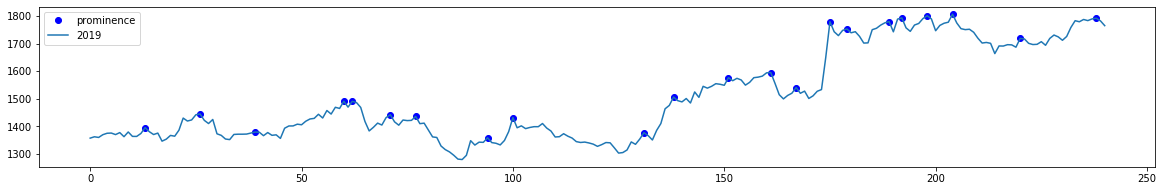

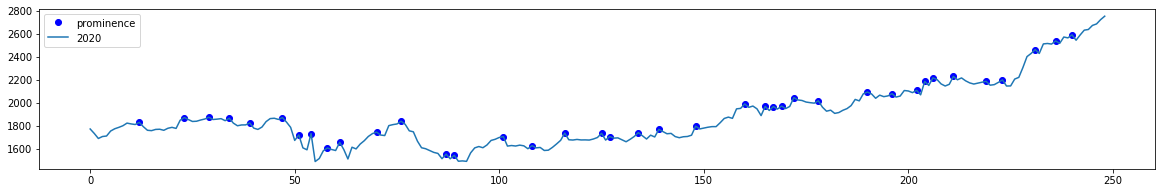

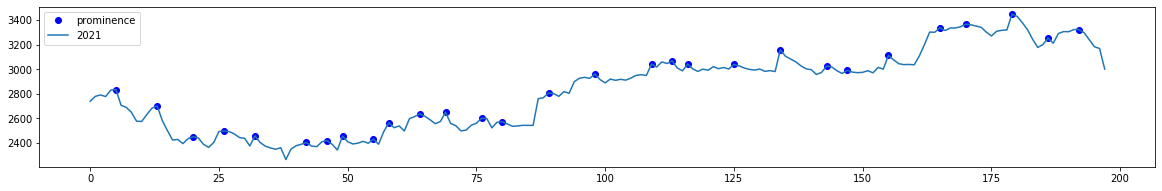

Min Date: Counter({2: 5, 1: 2, 3: 2, 8: 1, 6: 1, 5: 1})
Max Date: Counter({12: 4, 7: 2, 11: 2, 9: 2, 8: 1, 10: 1})
Avg Min-Max Ret: 52.59614161342619 , Median 44.361947805827185 , Min: 32.92937747292729 , Max: 84.9358898080379
Avg Open-Max Ret: 41.03461024296519 , Min: 15.197845476816992 , Max: 75.42507616920197


,Year,Max,Min,Min-Max Return,Open-Max Ret,Max_Date,Min_Date,Yr Open,Yr Close,Jan-Dec Ret,Apr-Mar(FY),NSE jan-Dec,NSE FY ret
0,2010,271.641083,159.657394,70.139995,67.332804,2010-12-23,2010-02-24,162.335822,263.832489,62.522656,23.438748,17.950742,11.135978
1,2011,305.966949,220.023865,39.060801,15.197845,2011-07-01,2011-02-28,265.601278,240.091660,-9.604479,27.529037,-25.142257,-9.245076
2,2012,415.925018,239.901779,73.373044,75.425076,2012-12-20,2012-01-02,237.095532,414.834686,74.965206,53.153113,26.290696,7.291809
3,2013,526.119446,369.752716,42.289542,26.471055,2013-11-08,2013-08-28,415.999887,463.166595,11.338154,12.439552,5.372244,17.672253
4,2014,761.330444,436.321869,74.488262,62.912216,2014-12-01,2014-02-20,467.325571,718.585876,53.765580,49.673704,31.445351,26.175793
5,2015,886.964050,667.244568,32.929377,23.629092,2015-08-05,2015-06-15,717.439591,851.042053,18.622120,8.110318,-4.130323,-8.785085
6,2016,1178.092529,804.519226,46.434354,38.672669,2016-10-13,2016-02-18,849.549187,864.989014,1.817414,24.214569,3.296717,18.860985
7,2017,1221.730469,870.376831,40.367991,40.933875,2017-09-12,2017-01-03,866.882054,1129.107056,30.249213,4.668595,28.265194,9.685927
8,2018,1437.270386,1073.650635,33.867605,26.800131,2018-07-24,2018-03-06,1133.492825,1347.764160,18.903634,34.566558,3.674523,13.971616
9,2019,1806.316406,1280.378296,41.076775,34.008543,2019-11-07,2019-05-16,1347.911388,1764.790771,30.927803,12.599655,11.957113,-26.295736


In [13]:
from collections import Counter
import seaborn as sns

data1,ticker,year,month=company('ASIANPAINT.NS','','2010-01-01','2021-12-31')

df1=maxRet_year(data1)

min_dt=[]
max_dt=[]
for k in range(0,len(df1)):
    min_dt.append(df1['Min_Date'][k].month)
    max_dt.append(df1['Max_Date'][k].month)

pksAndValley(data1,df2)
x=[]
y=[]
for m in range(0,len(df2)): #### the below lines gets the data for specific years from df2
    if(df2['Year'][m]>2009):
        x.append(df2['Jan-Dec Ret'][m])
        y.append(df2['Apr-Mar(FY)'][m])
df1['NSE jan-Dec']=x
df1['NSE FY ret']=y

print("Min Date:",Counter(min_dt))
print("Max Date:",Counter(max_dt))
print("Avg Min-Max Ret:",np.mean(df1['Min-Max Return']),",","Median",np.median(df1['Min-Max Return']),",","Min:",min(df1['Min-Max Return'][:-1]),",","Max:",max(df1['Min-Max Return'][:-1]))
print("Avg Open-Max Ret:",np.mean(df1['Open-Max Ret']),",","Min:",min(df1['Open-Max Ret'][:-1]),",","Max:",max(df1['Open-Max Ret'][:-1]))

df1

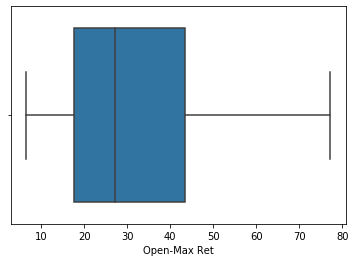

In [18]:
# plt.boxplot(df1['Open-Max Ret'])

import seaborn as sns
sns.boxplot(df1['Open-Max Ret'])

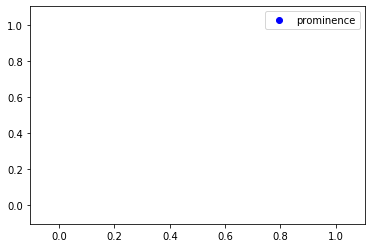

[]
Series([], Name: Close, dtype: float64)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
x = data1[(data1.index>'2008-01-01') & (data1.index<'2009-01-01')]['Close']
x.reset_index(inplace=True,drop=True)
# x=df1['Open-Max Ret']
# peaks, _ = find_peaks(x, height=0,distance=10)
peaks, _ = find_peaks(x,distance=10)
peaks2,_=find_peaks(x,prominence=30)
peaks3,_=find_peaks(x,width=20)
peaks4,_=find_peaks(x,threshold=0.4)


# plt.subplot(2, 2, 1)
# plt.plot(peaks, x[peaks], "xr"); plt.plot(x); plt.legend(['distance'])
# plt.subplot(2, 2, 2)
plt.plot(peaks2, x[peaks2], "ob"); plt.plot(x); plt.legend(['prominence'])
# plt.subplot(2, 2, 3)
# plt.plot(peaks3, x[peaks3], "vg"); plt.plot(x); plt.legend(['width'])
# plt.subplot(2, 2, 4)
# plt.plot(peaks4, x[peaks4], "xk"); plt.plot(x); plt.legend(['threshold'])
plt.show()
print(peaks2)
print(x[peaks2])
data1[data1['Close']==x[peaks[0]]]
# print(np.diff(peaks))
# print(peaks)
# peaks
# plt.plot(x)
# plt.plot(peaks, x[peaks], "+")
# plt.plot(np.zeros_like(x), "--", color="gray")
# plt.show()
# peaks
# data[data['Close']==x[7]]
# new_x=[]
# for k in range(0,len(x[peaks])):
#     y=x[k]
# #     lambda y: y+5>max(x),print(data[data['Close']==x[k]])
#     if y+3>max(x):
#         print(y,max(x))
#         new_x.append(y)
# print(new_x)
# peaks1
# print(peaks1)

In [ ]:
def exportToExcel(df):
    writer = pd.ExcelWriter('peaks_valleys_2403.xlsx', engine='xlsxwriter')
    df.to_excel(writer, sheet_name='Recommended Trades', index = False)
    
    background_color = '#0a0a23'
    font_color = '#ffffff'

    string_format = writer.book.add_format(
            {
                'font_color': font_color,
                'bg_color': background_color,
                'border': 1
            }
        )

    dollar_format = writer.book.add_format(
            {
                'num_format':'$0.00',
                'font_color': font_color,
                'bg_color': background_color,
                'border': 1
            }
        )

    integer_format = writer.book.add_format(
            {
                'num_format':'0',
                'font_color': font_color,
                'bg_color': background_color,
                'border': 1
            }
        )
    
    decimal_format = writer.book.add_format(
            {
                'num_format':'0.00',
                'font_color': font_color,
                'bg_color': background_color,
                'border': 1
            }
        )
    
    column_formats = { 
                    'A': ['Ticker', string_format],
                    'B': ['Trailing PE', decimal_format],
                    'C': ['CMP', decimal_format],
                    'D': ['50DMA',decimal_format],
                    'E': ['Market Cap',decimal_format],
                    'F': ['Sector',string_format],
                    'G': ['3 Red CS',string_format],
                    'H': ['2 Green CS',string_format],
                    'I': ['Total Change',decimal_format]
                    }

    for column in column_formats.keys():
        writer.sheets['Recommended Trades'].set_column(f'{column}:{column}', 20, column_formats[column][1])
        writer.sheets['Recommended Trades'].write(f'{column}1', column_formats[column][0], string_format)

    writer.save()

In [ ]:
xyz=[273,310,324,424,450,513,803,860,962,925,1116,1131]
pd.Series(xyz).pct_change()